<h1 style="background-color: #ffe4b5; color: #555555; padding: 20px; border-radius: 10px; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Helvetica', sans-serif; font-size: 36px; letter-spacing: 2px; text-transform: uppercase;">A/B TESTING</h1>

**A method used to test an argument. The main purpose of group comparisons is to check whether possible differences have arisen by chance.**

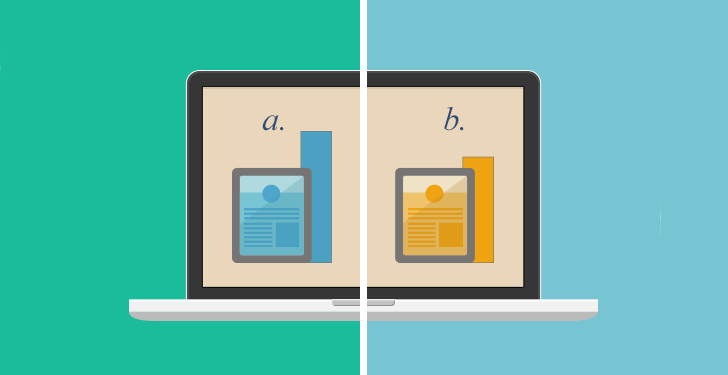

> *A/B testing allows us to compare the relationship between 2 groups. Comparisons are made between two groups on a ratio or mean. There are methods to be followed for these processes. Methods to Follow:*


**Methods to be applied for two independent samples T-test:**

1. Build the hypothesis.

2. Assumption check:

    Normality assumption.

        H0= Normal distribution assumption is provided.

        H1= Normal distribution assumption is not provided.




> *Note: The **shapiro** method is used when making the assumption of normality. If **p_value < 0.05** is provided from this method, H0 is rejected. If H1 is provided, the nan_parametric test method **mannwhitneyu** test method is performed without examining variance homogeneity.*


      Variance homogeneity.

          H0= Homogeneity was achieved in the distribution of variance.

          H1= Homogeneity could not be achieved in the distribution of variance.

> *Note: When checking the homogeneous distribution of variance, the **levene** method is used. If **p_value < 0.05** is provided from this method, H0 is rejected. In cases where the homogeneous distribution of the variance is provided and the assumption of normal distribution is not provided, the nan_parametric test method **mannwhitneyu** test method is used. The parametric test method **T test** is used in cases where the homogeneous distribution of the variance cannot be achieved and the assumption of normal distribution is provided.*

3. Comment:

    The hypothesis result is decided according to the p_value obtained as a result of the parametric or non-parametric test.

<h3 style="background-color: #daf862; color: #333223; padding: 12px; border: 2px solid #ff9800; border-radius: 8px; font-family: 'Tahoma', sans-serif; font-size: 18px; text-align: center; font-weight: bold;">1.Build the hypothesis</h3>

In the first stage, our hypothesis is determined. In our example, it will be determined whether customers who smoke influence the tip.


* H0 = There is no statistical relationship between smoking customers and tip.
* H1 = There is a statistical relationship between the smoking customers and the tip.

<h3 style="background-color: 	#c1cdcd; color: #333223; padding: 12px; border: 2px solid #ff9800; border-radius: 8px; font-family: 'Tahoma', sans-serif; font-size: 18px; text-align: center; font-weight: bold;">2.Assumption check</h3>

* H0 = Normal distribution assumption is provided.
* H1 = Normal distribution assumption not provided.

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset("tips")

In [3]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9367, p-value = 0.0002


*H0 is rejected because the p value is less than 0.005 in the above procedure. Therefore, since there is no normal distribution, non-parametric test is applied without examining the homogeneity of the variance.*

<h3 style="background-color: 	#ff8247; color: #111111; padding: 12px; border: 2px solid #ff9800; border-radius: 8px; font-family: 'Tahoma', sans-serif; font-size: 18px; text-align: center; font-weight: bold;">3.Comment</h3>

*When the assumptions were examined, it was seen that there was no homogeneous distribution. For this reason, the nan parameter method mannwhitneyu test method was used.*

In [4]:
test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == "Yes", "total_bill"],
                                 df.loc[df["smoker"] == "No", "total_bill"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 7531.5000, p-value = 0.3413


*H0 cannot be rejected because the p value is greater than 0.005 in the above test method.*

> **As a result, our H0 hypothesis was found as "There is no statistical relationship between smokers and tipping". We understand that smokers have no statistical effect on tipping.**

> *NOTE: If homogeneity is not observed in the normal distribution and variance in the assumption check, the t_test will be performed as follows and only equal_var=False will be made.*



> *NOTE: The situation mentioned in the above note will only be valid when there is a normal distribution. If there is no normal distribution already, t_test cannot be applied and non-parametric tests are applied.*

In [5]:
test_stat, pvalue = ttest_ind(df.loc[df["smoker"] == "Yes", "total_bill"],
                              df.loc[df["smoker"] == "No", "total_bill"],
                              equal_var=False)